#### Question: What are the factors that affect Customer's Satisfaction?

##### Expectations:
The results should provide actionable insights for the company to improve customer satisfaction and CLTV. This could involve recommendations for enhancing product/service offerings, refining customer support processes, optimizing pricing strategies, implementing effective loyalty programs, or other initiatives aimed at increasing customer satisfaction and maximizing CLTV.

#### EDA:

In [1]:
# Importing the libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter
import sys
sys.path.insert(1, '../')
from Utils import readAll_ImortantFeat

In [2]:
dataset = readAll_ImortantFeat()

In [3]:
dataset.dtypes

Age                         int64
Number of Dependents        int64
Churn Value                 int64
Tenure Months               int64
Churn Score                 int64
Monthly Charges           float64
CLTV                        int64
Total Revenue             float64
Satisfaction Score          int64
Gender                      uint8
Married                     uint8
Phone Service               uint8
Internet Service            uint8
Multiple Lines              uint8
Online Security             uint8
Online Backup               uint8
Device Protection Plan      uint8
Premium Tech Support        uint8
Unlimited Data              uint8
Referred a Friend           uint8
Churn Category             object
dtype: object

In [4]:
# drop the column Churn Category if it exists
if 'Churn Category' in dataset.columns:
    dataset.drop('Churn Category', axis=1, inplace=True)

In [5]:
dataset.head()

,Age,Number of Dependents,Churn Value,Tenure Months,Churn Score,Monthly Charges,CLTV,Total Revenue,Satisfaction Score,Gender,Married,Phone Service,Internet Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Referred a Friend
0,78,0,1,1,100,39.65,5433,59.65,3,1,0,0,1,0,0,0,1,0,0,0
1,74,1,1,8,69,80.65,5302,1024.10,3,0,1,1,1,1,0,1,0,0,1,1
2,71,3,1,18,81,95.45,3179,1910.88,2,1,0,1,1,1,0,0,0,0,1,0
3,78,1,1,25,88,98.50,5337,2995.07,2,0,1,1,1,0,0,1,1,0,1,1
4,80,1,1,37,67,76.50,2793,3102.36,2,0,1,1,1,1,0,0,0,0,1,1


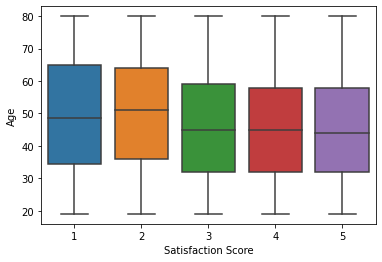

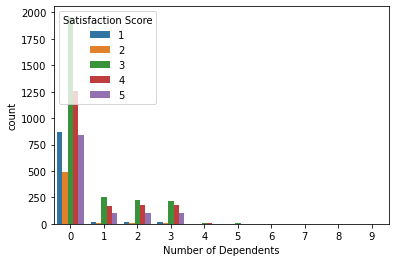

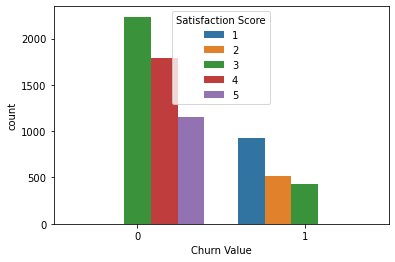

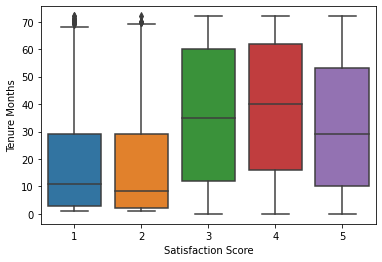

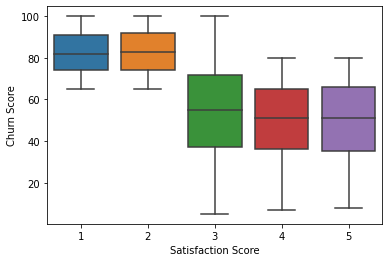

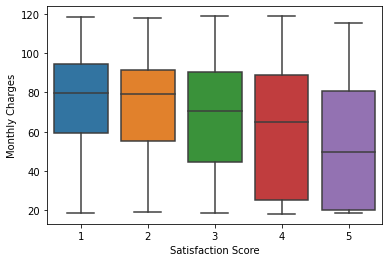

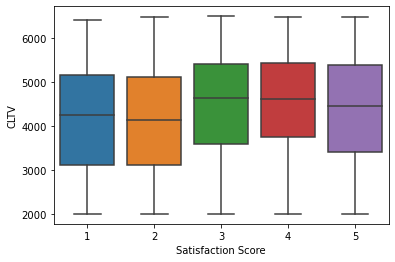

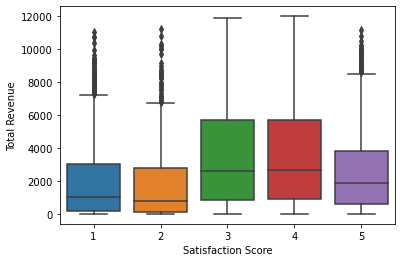

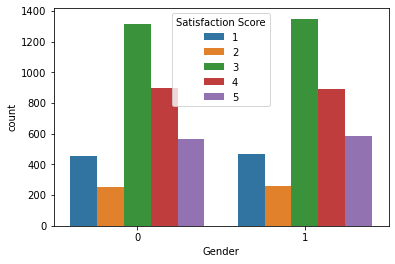

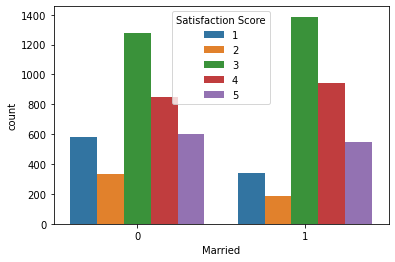

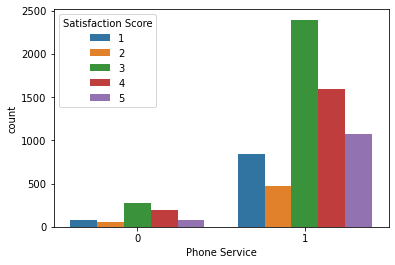

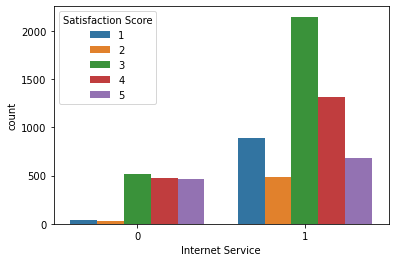

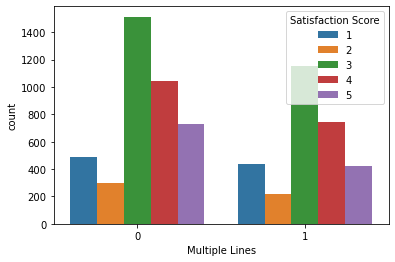

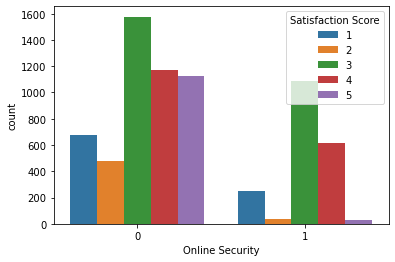

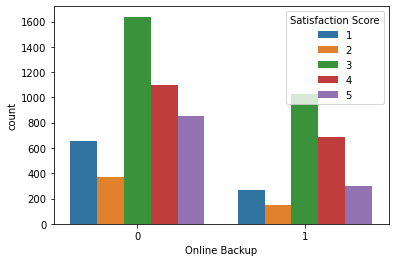

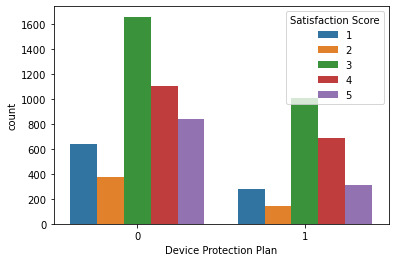

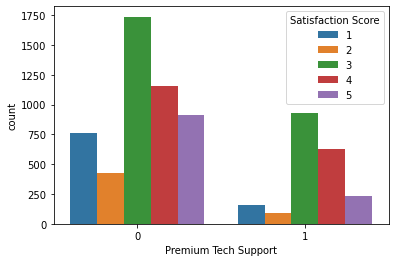

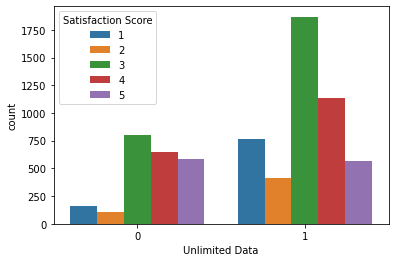

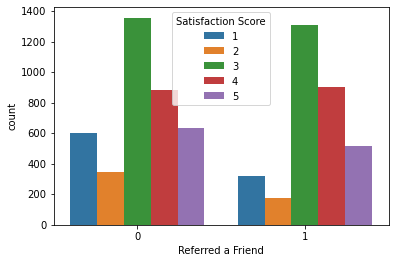

In [6]:
# First we are concerned with the features that affects Satisfaction Score
# So visualize the distribution of all features on X-axis with Satisfaction Score on Y-axis using seaborn
# This will give us an idea of how each feature affects the Satisfaction Score
# We will use boxplot for continuous features and countplot for categorical features
continuous_features = ['Age', 'Number of Dependants', 'Tenure Months', 'CLTV', 'Churn Score', 'Monthly Charges', 'Total Revenue']
for feature in dataset.columns:
    if feature != "Satisfaction Score" and feature not in continuous_features:
        sns.countplot(x=feature, hue="Satisfaction Score", data=dataset)
        plt.show()
    elif feature != "Satisfaction Score":
        sns.boxplot(x="Satisfaction Score", y=feature, data=dataset)
        plt.show()



##### Insights:
1. `Gender`, `Married` features don't affect `Satisfaction Score`. So we can deduce that demographic features don't affect `Satisfaction Score`.
2. `all Service features` tend to have the same distribution of `Satisfaction Score` in the both cases of having the service or not. So we can deduce that `Service features` don't affect `Satisfaction Score`.
3. `Satisfaction Score` feature increases when `Monthly Charges` decreses so this feature may be a good predictor for `Satisfaction Score` (Negative correlation).
4. the same for`Tenure Months` feature, it increases when `Satisfaction Score` increases (Positive Correlation).

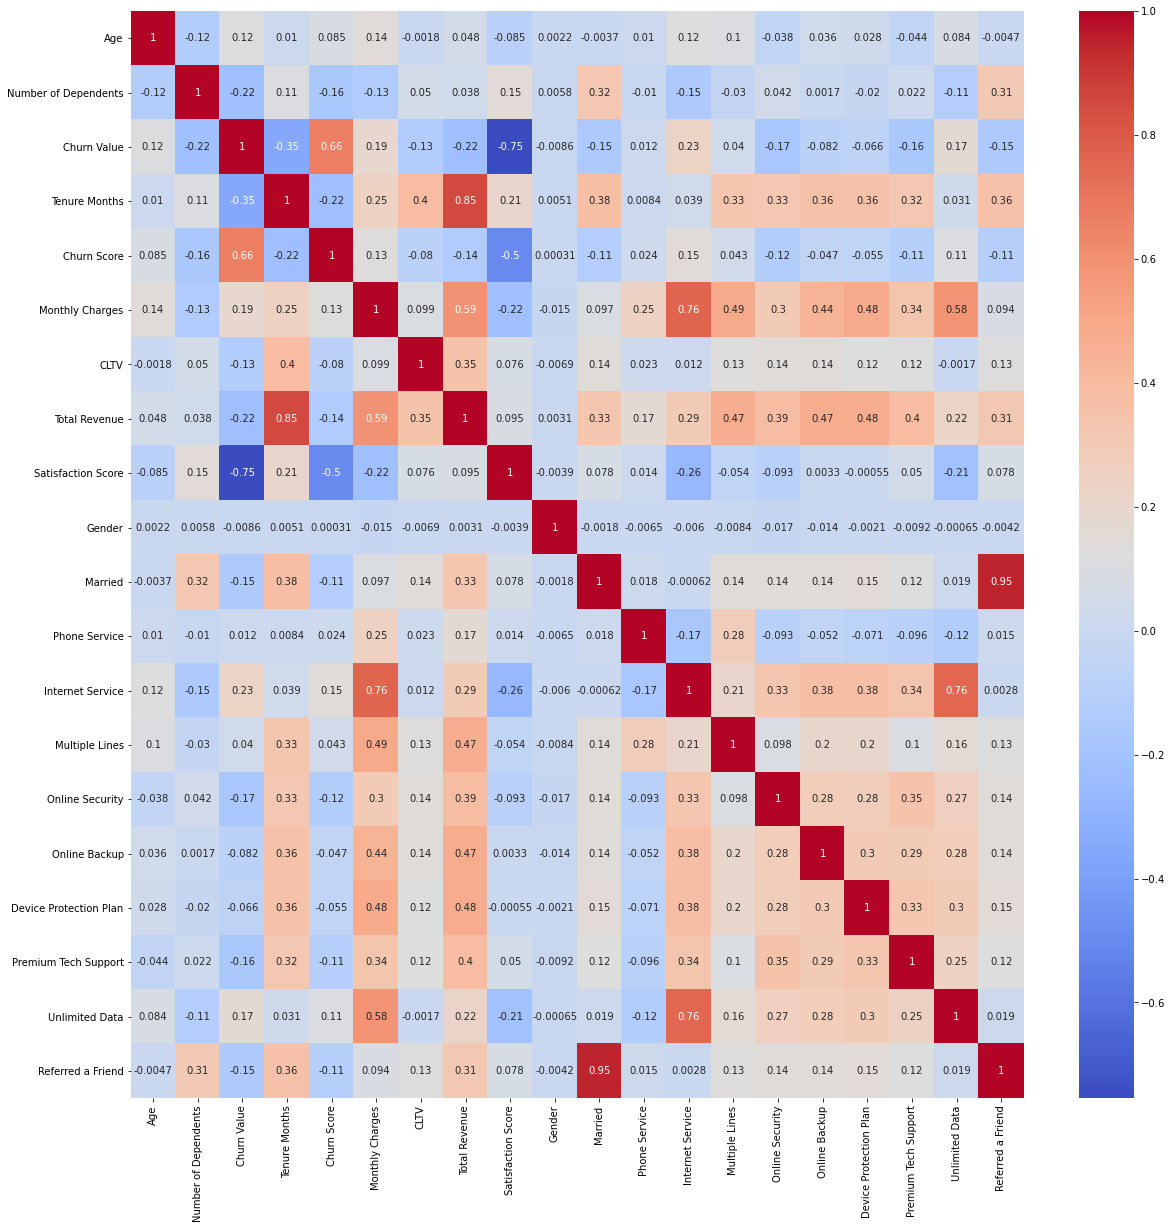

In [7]:
#visualize the correlation between the features
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

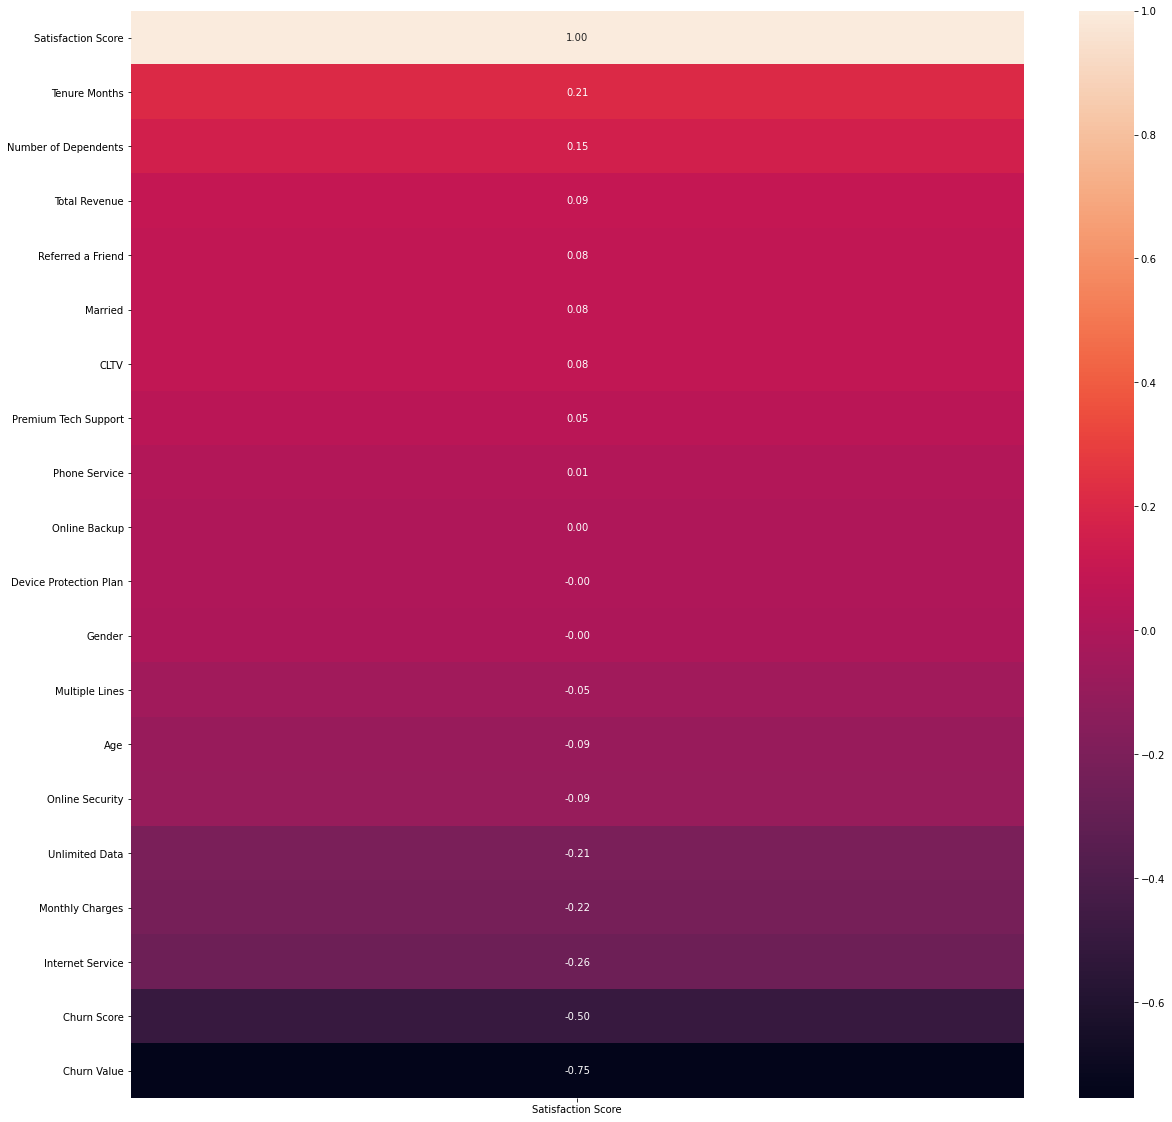

In [8]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr()[['Satisfaction Score']].sort_values(
    by='Satisfaction Score', ascending=False), annot=True, fmt='.2f')
plt.show()

##### Insights:
After investigating the correlation matrix we can say that the previous expectations matches the data.